<H1> Relative Humidity Calculations </H1> <br> 
 What is the interaction between Temperature and Humidity?<br> 
<hr> 
<H2>Modification history </H2>
<table>
    <tr>
        <th> Modified </th>
        <th> BY </th>
        <th> Reason </th>
    </tr>
    <tr>
        <td> 15-Jan-25</td>
        <td> CBL </td>
        <td> Original </td>
    </tr>
    <tr>
        <td> 08-Aug-25</td>
        <td> CBL </td>
        <td> Added in wet bulb method </td>
    </tr>
</table>

<hr> 
<H2> References </H2> 
<UL>
    <li><a href = "https://journals.ametsoc.org/view/journals/apme/57/6/jamc-d-17-0334.1.xml"> Basic </a> </li>
    <li> <a href = "https://engineering.stackexchange.com/questions/50698/how-do-i-compute-the-saturation-temperature-of-liquid-water"> Basic EQ </a> </li>
    <li> <a href = "https://www.wikihow.com/Calculate-Humidity"> Calculate Humidity</a> </li>
    <li> <a href = "https://www.weather.gov/media/epz/wxcalc/vaporPressure.pdf"> weather Vapor Pressure </a></li>
    <li> "Marks' Standard Handbook for Mechanical Engineers", Eighth Edition, pp. 4-28 through 4-45</li>
    <li> <a href = "http://python.hydrology-amsterdam.nl/moduledoc/index.html"> Netherlands Hydrology </a></li>
    <li> <a href = "https://github.com/Kirubaharan/hydrology/blob/master/checkdam/meteolib.py"> Github for above. </a></li>
    <li> <a href="https://www.1728.org/relhum.htm"> Wet Bulb </a></li>
</UL>
<hr>
<H2> Notes to reader </H2>
First, when you look at my definitions, you will see that I try to create headers for each "def". These are using the format called out by doxygen. These notebooks are always designed to be pulled out as stand alone python, and as such should be as carefully documented as possible. <br> 

Many times, there will be markdown cells explaining the thought process or internal monologs and discussing results. 
<hr>
From Marks' handbook the following are defined:<br> 
<UL>
    <li> Modal Humidity: f is the mass of the water vapor in mols/mol $f = {{p_v}\over{p_a}} = ({{P_v}\over{p_t}}-p_v$)</li>
    <li> Specific humidity: ${W = f\over{1.61}}$ where W is the mass of the water vapor per mass of air</li>
    <li> Notation:
        <ul> 
            <li> a - air </li>
            <li> v - vapor </li>
            <li> m - mixture </li>
            <li> f - Modal humidity </li>
            <li> d and w apply to dry and wet bulb measurements. </li>
        </ul>
    </li>
    <li> Relative Humidity: $ r = {{p_v}\over{p_d}}$ </li>
    <li> Specific Humidity: $ W = {{p_v}\over{1.61(p_t-p_v)}}$ mass/mass dry air</li>
</UL>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as konst
import math

<H1> Antoine Equaton </H1>
<a href = "https://en.wikipedia.org/wiki/Antoine_equation"> Reference </a> <br> 
Form<br>
$T = {B\over{A-log_{10}(p)}} - C$
<br> 
inverted: <br> 
$P = 10^{(A - {B\over{(T+C)}})}$

In [2]:
class Antoine():
    def __init__(self):
        self.__Water__ = True
        self.A = 8.07131
        self.B =   1730.63
        self.C =    233.426
        
    def SetType(self, Type = True):
        self.__Water__ = Type
        if(Type):
            print ("Type set to Water!")
            # Water {1:100} C
            self.A =    8.07131
            self.B = 1730.63
            self.C =  233.426
        else:
            print ("Type set to Ethanol")
            # Ethanol {-57:80}C
            self.A =    8.20417
            self.B = 1642.89
            self.C = 230.300
            
    def Temperature(self, P):
         """
         from pressure 
         @param P - pressure in mm of Mercury or Torr
         """
         T = self.B/(self.A - np.log10(P)) - self.C
         return T
         
    def Pressure(self, T):
        """
        @param T - temperature in degrees C
        @returns vapor pressure in torr 
    
        Ref: https://en.wikipedia.org/wiki/Antoine_equation
        """
        #TK = T + 273.15
        res = self.A - (self.B/(T+self.C))
        P = np.power(10.0,res) # in mm of Mercury
        return P

    def __str__(self):
        """
        Overloaded print function
        """
        return f"Antoine(Water=','{self.__Water__}', ' A = ', '{self.A}', ' B = ', '{self.B}', ' C = ', '{self.C}')"

In [3]:
# test
T  = 20    # C
P0 = 760.0 # Torr
CA = Antoine()
CA.SetType(False)
print(CA)
T0 = CA.Temperature(P0)
print('Antoine for: ', P0, ' Torr Result = ', T0 )

print('Antoine for: ', T, ' C. Result = ', CA.Pressure(T0))

Type set to Ethanol
Antoine(Water=','False', ' A = ', '8.20417', ' B = ', '1642.89', ' C = ', '230.3')
Antoine for:  760.0  Torr Result =  78.31920077673254
Antoine for:  20  C. Result =  760.0


In [4]:
def VaporPressure1(T):
    """
    @param T - temperature in degrees C
    @returns vapor pressure in mb or hectoPascal (hPa)
    What specifically this is for depends on the temperature passed in. It can be:
    Dewpoint Temperture
    or
    Air Temperature
    Ref: https://www.wikihow.com/Calculate-Humidity
    """
    ir = (7.5*T)/(237.3+T)      # intermediate result, power of 10 
    VP = 6.11 * np.power(10.0, ir)
    return VP

In [5]:
def RH(T,T_s):
    """
    @param T   - Current air temperature
    @param T_s - Saturation Temperature
    @return - calculate the relative humidity in percent
    """
    e  = VaporPressure1(T_s)   # actual vapor pressure based on current air temperature
    es = VaporPressure1(T)     # saturation vapor pressure based on saturation temperature (Dew Point)
    print("E: ", e, " Es: ", es)
    return e/es * 100.0

In [91]:
# check work
Ta  = 29.44
Tdp = 18.33
print("RH: ", RH(Ta, Tdp))
# check!

E:  21.078038922721873  Es:  41.09732670444891
RH:  51.288102202618724


In [14]:
def WetBulb(T_d, T_w):
    """
    Determine relative humidity using the wet bulb method. 
    Reference: https://www.1728.org/relhum.htm
    @param T_d - dry bulb temperature in C
    @param T_w - wet bulb temperature in C
    """
    N = 0.6687451584
    e_d = 6.112 * np.exp((17.502*T_d)/(240.97+T_d))
    print ("ED: ", e_d)
    e_w = 6.112 * np.exp((17.502*T_w)/(240.97+T_w))
    print("EW: ", e_w)
    RH = (e_w - N * (1+0.00115*T_w) * (T_d-T_w))/e_d * 100
    return RH

In [15]:
# Check work. 
Td = 20
Tw = 15
print ("Wet bulb measurement: ", WetBulb(Td, Tw), " %")

ED:  23.372442325987585
EW:  17.045428679572332
Wet bulb measurement:  58.376542029112976  %


Goff-Gratch Equation for Water <br> 
Ref: <a href="https://resources.wolframcloud.com/FormulaRepository/resources/GoffGratch-Equation-for-Water"> Goff-Gratch</a> <br> 
${ln(P_w(0.000986923/hPa))\over {ln(10)}} = -1.3816 10^{-7 } (10^{11.344(T({-0.00267989\over{K}})+1)}-1) + 0.0081328(10^{-3.49149({373.15K\over{T}}-1)}) - 7.90298({373.15K\over{T}} - 1) + 2.18367 ln({373.15K\over{T}})$
<br> 
If you look down in this Wolfram example, you will see a closed form solution. 

In [103]:
class GoffGratch():
    def __init__(self):
        self.__Tsteam__ = 373.15  # Kelvin
        self.__est__    = 1013.25 # hPa
        
    def One(self, TC):
        """
        reference: https://en.wikipedia.org/wiki/Goff%E2%80%93Gratch_equation
        @param TC - temperature in C
        @returns Saturation vapor pressure in bar.  

        The equation works in kelvin. 
        Also, this works for non-ice (near phase change) conditions. This is simplified relative 
        to the Wolfram example. Not quite sure how to invert this. 
        """
        # Convert input temperature from C to K. 
        T = 273.15 + TC       # 0C = 273.15K
        R = self.__Tsteam__/T 
        
        Term1 = -1.381610e-7 * (np.power(10, 11.344*(T * -0.00267989)+1.0) - 1.0)
        Term2 =  0.0081328   * (np.power(10,-3.49149*(R-1.0)))
        Term3 = -7.90298     * (R - 1.0)
        Term4 =  2.18367     * np.log(R)

        Pwl   = (Term1 + Term2 + Term3 + Term4) * np.log(10.0)/0.000986923
        pws   = np.power(10, Pwl)

        # 1 hPa = 0.001 bar 1Pa = 1N/m^2
        pws = pws/1000.0 # convert to bar
        return pws
        
    def Two(self, TC):
        """
        reference: https://resources.wolframcloud.com/FormulaRepository/resources/GoffGratch-Equation-for-Water
        @param TC - temperature in C
        @returns Saturation vapor pressure in bar.  

        The equation works in kelvin. 
        Also, this works for non-ice (near phase change) conditions. This is simplified relative 
        to the Wolfram example. OUTPUT of Wolfram Solver
        """
        # Convert C to K. 
        T = 273.15 + TC     # 0C = 273.15K

        Term1 =  -1.3816e-7 * (np.power(10.0, 11.344 * (1.0 - 0.00267989*T)) - 1.0)
        print('Term 1 ', Term1)
        Term2 =  2.18367   * np.log(Tsteam/T)
        print('Term 2 ', Term2)
        Term3 = -7.90298   * (Tsteam/T - 1.0)
        print('Term 3 ', Term3)

        rv = Term1 + Term2 + Term3
        return rv
        
    def Three(self):
        print('testme')


<a href="https://www.omnicalculator.com/chemistry/vapour-pressure-of-water"> online calculator <a>

In [105]:
# Quick Check
T = 21    # C
GG = GoffGratch()
GG.Three()
#svp = GG.One(T)
#print(' GG Result: ', svp)

testme


ValueError: x, y, and format string must not be None

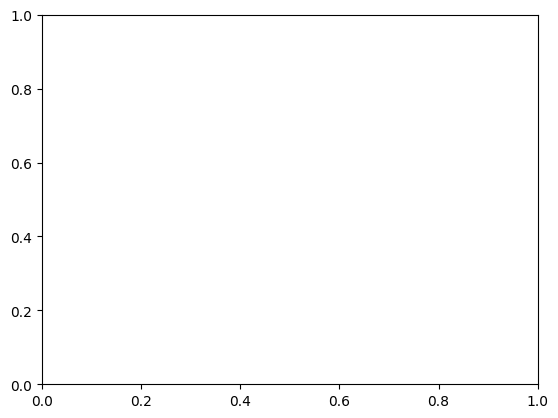

In [12]:
# Test result
# T in C from 0-100
T = np.arange(20,100,1) 
pws = GoffGratch(T)
plt.plot(T,pws)
plt.grid()

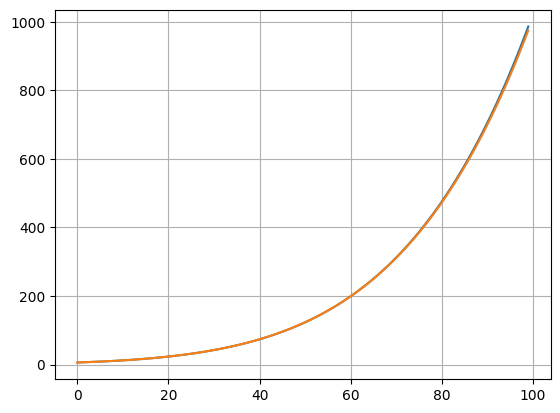

In [19]:
# do a RH plot
T = np.arange(0,100,1) 
TI = T + 273.15 # offset to Kelvin at 0C
pws = GoffGratch(TI)
pp  = VaporPressure1(T)
RH  = pp/pws * 100
plt.plot(T,pp, pws)
plt.grid()
# oy these are the same. 